In [ ]:
# File Imports
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [81]:
# Import the data:
file_location = "./resources/data_science_salaries.csv"
file_path = Path(file_location)

salary_df = pd.read_csv(file_path)
# Display the DataFrame:
salary_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [82]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


# Prepare the data

In [83]:
# Drop the salary and salary currency columns
cleaned_df = salary_df.copy().drop(columns=['salary', 'salary_currency'])
cleaned_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,United States,Medium


In [84]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary_in_usd       6599 non-null   int64 
 7   company_location    6599 non-null   object
 8   company_size        6599 non-null   object
dtypes: int64(2), object(7)
memory usage: 464.1+ KB


## Scale the data

In [85]:
scaled_data = StandardScaler().fit_transform(cleaned_df[['salary_in_usd']])
scaled_data[0:5]

array([[ 0.03579629],
       [-0.66055248],
       [-0.07793127],
       [-0.64191739],
       [-0.36030493]])

In [86]:
# Create a DataFrame of the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=['salary_in_usd'])

# Update the cleaned data frame
cleaned_df['salary_in_usd'] = scaled_df['salary_in_usd']

cleaned_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,0.035796,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,-0.660552,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,-0.077931,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,-0.641917,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,-0.360305,United States,Medium


## Label encoder

In [87]:
nominal_features = cleaned_df.select_dtypes(include="object").columns
print(nominal_features)

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'employee_residence', 'company_location', 'company_size'],
      dtype='object')


In [99]:
# Encode catgegory fields using get_dummies
encoded_df = pd.get_dummies(cleaned_df, columns=nominal_features, drop_first=True, dtype=int)
encoded_df.head()


,work_year,salary_in_usd,job_title_AI Developer,job_title_AI Engineer,job_title_AI Product Manager,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,job_title_Analytics Engineer,...,company_location_Switzerland,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Vietnam,company_size_Medium,company_size_Small
0,2024,0.035796,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,2024,-0.660552,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2024,-0.077931,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,2024,-0.641917,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,2024,-0.360305,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### Use the elbow method to find the best `k`.

In [100]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

In [101]:
# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=42)
    k_model.fit(encoded_df)
    inertia.append(k_model.inertia_)

In [102]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {'k' : k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)

# Review the DataFrame
elbow_df.head()

,k,inertia
0,1,27111.611911
1,2,22596.311553
2,3,20646.247657
3,4,18383.265129
4,5,17341.653516


<Axes: title={'center': 'elbow curve'}, xlabel='k'>

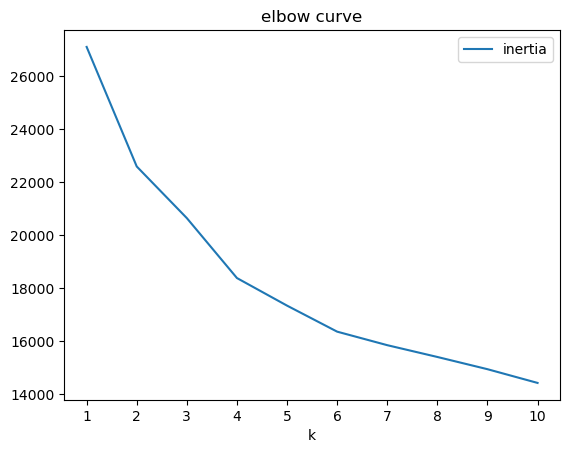

In [103]:
# Plot the elbow curve
elbow_df.plot.line(x='k', y='inertia', xticks=k, title='elbow curve')

##  Apply the KMeans Algorithm
---
### Use Kmeans to cluster data

In [104]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, n_init='auto', random_state=42)

# Fit the model
model.fit(encoded_df)

# Make predictions
predictions = model.predict(encoded_df)

# Create a copy of the preprocessed data
salary_predictions_df = encoded_df.copy()

# Add a class column with the labels
salary_predictions_df['salary_segments'] = predictions

salary_predictions_df.head()

,work_year,salary_in_usd,job_title_AI Developer,job_title_AI Engineer,job_title_AI Product Manager,job_title_AI Programmer,job_title_AI Research Engineer,job_title_AI Scientist,job_title_AWS Data Architect,job_title_Analytics Engineer,...,company_location_Thailand,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom,company_location_United States,company_location_Vietnam,company_size_Medium,company_size_Small,salary_segments
0,2024,0.035796,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,2024,-0.660552,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,2024,-0.077931,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
3,2024,-0.641917,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,2024,-0.360305,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,2


<Axes: xlabel='work_year', ylabel='salary_in_usd'>

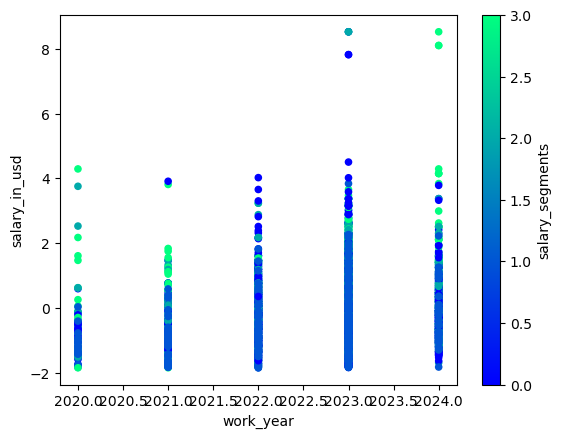

In [118]:
# Plot the clusters
salary_predictions_df.plot.scatter(
    x='work_year',
    y='salary_in_usd',
    c='salary_segments',
    colormap='winter'
)

### Optimize Clusters with Principal Component Analysis.

In [105]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=2)

In [106]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
scaled_data_pca = pca.fit_transform(encoded_df)

# View the first five rows of the DataFrame. 
scaled_data_pca[0:5]

array([[ 0.03878975,  0.33512248],
       [-0.58298163,  0.51346618],
       [ 0.27157209,  0.18209961],
       [-0.23201238,  0.32654356],
       [-0.13656756,  1.41617938]])

In [107]:
pca.explained_variance_ratio_

array([0.281015  , 0.13474813])

## Ordinal Encoder

In [108]:
columns_to_encode = ['job_title',
                     'experience_level',
                     'employment_type',
                     'work_models',
                     'employee_residence',
                     'company_location',
                     'company_size']

In [109]:
le_encoded_df = cleaned_df.copy()

for column in columns_to_encode:
    le_encoded_df[column] = le_encoded_df[column].astype("category").cat.codes

le_encoded_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
0,46,2,2,2,2024,84,0.035796,73,1
1,46,2,2,2,2024,84,-0.660552,73,1
2,73,3,2,2,2024,84,-0.077931,73,1
3,73,3,2,2,2024,84,-0.641917,73,1
4,19,2,2,1,2024,84,-0.360305,73,1


### Use the elbow method to find the best `k`.

In [110]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=42)
    k_model.fit(le_encoded_df)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {'k' : k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)

# Review the DataFrame
elbow_df.head()

,k,inertia
0,1,1.071808e+07
1,2,6.920893e+06
2,3,2.783109e+06
3,4,1.907829e+06
4,5,1.403589e+06


<Axes: title={'center': 'elbow curve'}, xlabel='k'>

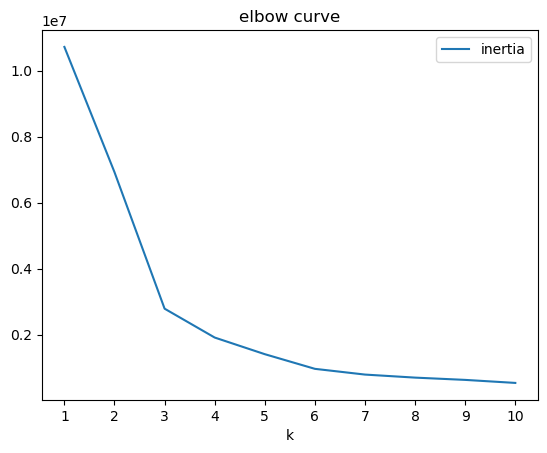

In [111]:
# Plot the elbow curve
elbow_df.plot.line(x='k', y='inertia', xticks=k, title='elbow curve')

In [120]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, n_init='auto', random_state=42)

# Fit the model
model.fit(le_encoded_df)

# Make predictions
predictions = model.predict(le_encoded_df)

# Create a copy of the preprocessed data
salary_predictions_df = le_encoded_df.copy()

# Add a class column with the labels
salary_predictions_df['salary_segments'] = predictions

salary_predictions_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size,salary_segments
0,46,2,2,2,2024,84,0.035796,73,1,0
1,46,2,2,2,2024,84,-0.660552,73,1,0
2,73,3,2,2,2024,84,-0.077931,73,1,2
3,73,3,2,2,2024,84,-0.641917,73,1,2
4,19,2,2,1,2024,84,-0.360305,73,1,0


<Axes: xlabel='job_title', ylabel='salary_in_usd'>

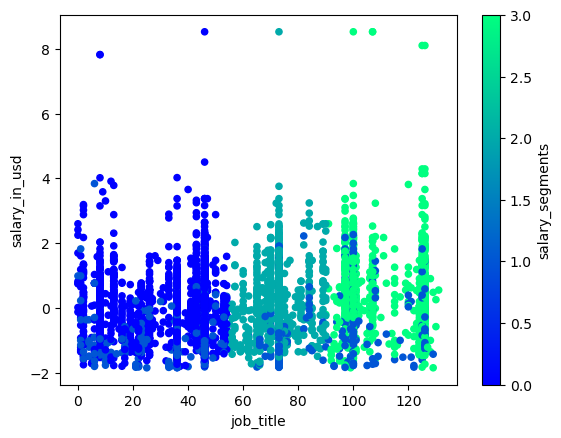

In [135]:
# Plot the clusters
salary_predictions_df.plot.scatter(
    x='job_title',
    y='salary_in_usd',
    c='salary_segments',
    colormap='winter'
)

In [149]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=2)

In [150]:
scaled_data_pca = pca.fit_transform(le_encoded_df)

# View the first five rows of the DataFrame. 
scaled_data_pca[0:5]

array([[-15.21786671,   8.6591759 ],
       [-15.2220036 ,   8.65291854],
       [ 11.7775954 ,   9.13055738],
       [ 11.77424485,   9.12548942],
       [-42.21391827,   8.18625473]])

In [151]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.60334427, 0.3854417 ])

In [152]:
pca_component_weights = pd.DataFrame(pca.components_.T,
                                     columns=['PCA1', 'PCA2'],
                                     index=le_encoded_df.columns)
pca_component_weights

,PCA1,PCA2
job_title,0.999819,0.017356
experience_level,0.001028,0.003789
employment_type,-0.000115,0.000116
work_models,-0.001411,0.000747
work_year,-0.000038,0.004834
employee_residence,-0.010253,0.758740
salary_in_usd,0.005941,0.008986
company_location,-0.014790,0.651071
company_size,0.000045,0.000891


In [158]:
df_pca = pd.DataFrame(scaled_data_pca, columns=['PCA1', 'PCA2'])

df_pca.head(5)

,PCA1,PCA2
0,-15.217867,8.659176
1,-15.222004,8.652919
2,11.777595,9.130557
3,11.774245,9.125489
4,-42.213918,8.186255


In [160]:
# Creating a DataFrame with the PCA data
df_pca = pd.DataFrame(scaled_data_pca, columns=['PCA1', 'PCA2'])

# Display sample data
df_pca.head(5)
df_pca.head(-5)

,PCA1,PCA2
0,-15.217867,8.659176
1,-15.222004,8.652919
2,11.777595,9.130557
3,11.774245,9.125489
4,-42.213918,8.186255
...,...,...
6589,-13.921664,-65.654734
6590,37.063297,-64.782524
6591,13.076485,-65.186047
6592,13.074497,-65.194758


In [161]:
# Create a a list to store inertia values and the values of k
inertia = []
k = list(range(1, 11))

# Create a for loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the service_ratings DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=42)
    k_model.fit(df_pca)
    inertia.append(k_model.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {'k' : k, 'inertia': inertia}
elbow_df = pd.DataFrame(elbow_data)

# Review the DataFrame
elbow_df.head()

,k,inertia
0,1,1.059788e+07
1,2,6.800694e+06
2,3,2.663025e+06
3,4,1.787779e+06
4,5,1.283951e+06


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

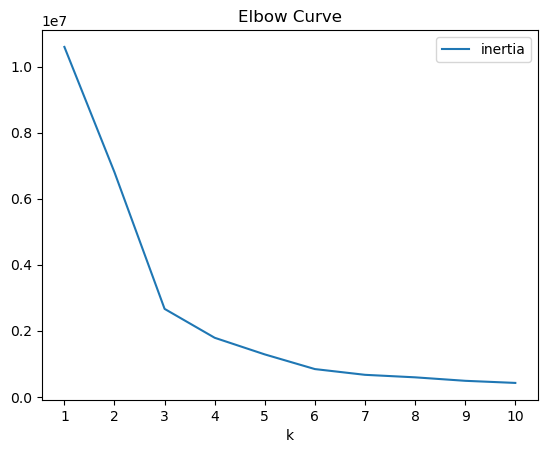

In [162]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_df.plot.line(x='k',
                   y='inertia',
                   title="Elbow Curve", 
                   xticks = k)

In [165]:
# Define the model with 4 clusters
model = KMeans(n_clusters=4, n_init='auto', random_state=42)

# Fit the model
model.fit(df_pca)

# Make predictions
predictions = model.predict(df_pca)

# Create a copy of the preprocessed data
salary_predictions_pca_df = df_pca.copy()

# Add a class column with the labels
salary_predictions_pca_df['salary_segments'] = predictions

salary_predictions_pca_df.head()

,PCA1,PCA2,salary_segments
0,-15.217867,8.659176,0
1,-15.222004,8.652919,0
2,11.777595,9.130557,3
3,11.774245,9.125489,3
4,-42.213918,8.186255,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

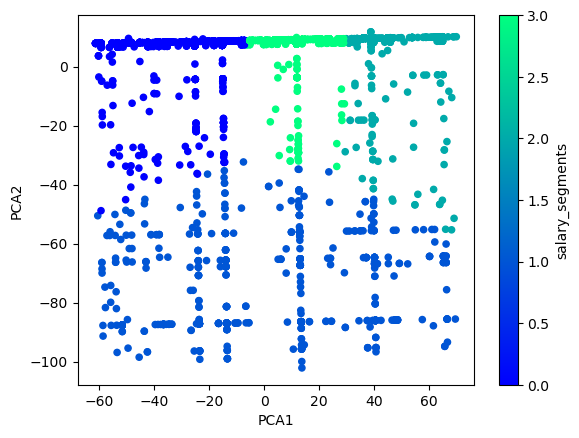

In [166]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
salary_predictions_pca_df.plot.scatter(
    x='PCA1',
    y='PCA2',
    c='salary_segments',
    colormap='winter'
)

In [171]:
le_encoded_df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
0,46,2,2,2,2024,84,0.035796,73,1
1,46,2,2,2,2024,84,-0.660552,73,1
2,73,3,2,2,2024,84,-0.077931,73,1
3,73,3,2,2,2024,84,-0.641917,73,1
4,19,2,2,1,2024,84,-0.360305,73,1


In [172]:
scaled_data_n = StandardScaler().fit_transform(le_encoded_df[['job_title', 'employee_residence', 'company_location']])
scaled_data_n[0:5]

array([[-0.48127261,  0.35621634,  0.34638824],
       [-0.48127261,  0.35621634,  0.34638824],
       [ 0.38130582,  0.35621634,  0.34638824],
       [ 0.38130582,  0.35621634,  0.34638824],
       [-1.34385105,  0.35621634,  0.34638824]])

In [174]:
scaled_df_n = pd.DataFrame(scaled_data_n, columns=['job_title', 'employee_residence', 'company_location'])

# Update the cleaned data frame
le_encoded_df['job_title'] = scaled_df_n['job_title']
le_encoded_df['employee_residence'] = scaled_df_n['employee_residence']
le_encoded_df['company_location'] = scaled_df_n['company_location']

le_encoded_df.head()


,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary_in_usd,company_location,company_size
0,-0.481273,2,2,2,2024,0.356216,0.035796,0.346388,1
1,-0.481273,2,2,2,2024,0.356216,-0.660552,0.346388,1
2,0.381306,3,2,2,2024,0.356216,-0.077931,0.346388,1
3,0.381306,3,2,2,2024,0.356216,-0.641917,0.346388,1
4,-1.343851,2,2,1,2024,0.356216,-0.360305,0.346388,1


In [175]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=2)

scaled_data_pca = pca.fit_transform(le_encoded_df)

# View the first five rows of the DataFrame. 
scaled_data_pca[0:5]

array([[ 0.53054976, -0.55572365],
       [ 0.30890103, -0.97588336],
       [ 0.70611619,  0.29321435],
       [ 0.52659866, -0.047081  ],
       [ 0.34654569, -1.30825874]])

In [176]:
pca.explained_variance_ratio_

array([0.36823723, 0.21211942])

In [177]:
pca_component_weights = pd.DataFrame(pca.components_.T,
                                     columns=['PCA1', 'PCA2'],
                                     index=le_encoded_df.columns)
pca_component_weights

,PCA1,PCA2
job_title,0.048908,0.624040
experience_level,0.169579,0.379275
employment_type,0.002107,-0.001977
work_models,0.015737,-0.024746
work_year,0.120661,0.044180
employee_residence,0.654240,-0.216551
salary_in_usd,0.318301,0.603375
company_location,0.651388,-0.230623
company_size,0.019683,0.003628
